## Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


#### 2.a: open the student_records.csv file and print out the first 10 rows

In [23]:
#TODO

import pandas as pd
student_data = pd.read_csv('student_records.csv')
print(student_data.head(10))



   roll_number department  credit course_name      course_type grade
0       588946         MA       3       EC250  hasmed_elective    AB
1       145372         EP       4       EP407  hasmed_elective    CC
2       834515         MA       8       EP885  hasmed_elective    BB
3       344265        CSE       6      CSE699          honours    AB
4       358405         MA       3       EE460            minor    AP
5       781075         CE       8       CE540          honours    CC
6       180828        CSE       6       CE880            minor    AB
7       981238         MM       4      CSE226            minor    AB
8       836881         MM       8       MM530             core    AA
9       310604         EE       8       EE202             core    AB


#### 2.b: Print out the total credits and calculte CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=8, BC=7, CC=6)

In [24]:
# Calculate total credits and CPI for each student
course_grade = {'AA': 10, 'AB': 9, 'BB': 8, 'BC': 7, 'CC': 6,'CD': 5, 'DD': 4, 'FF': 0, 'AP': 10, 'NP': 0}
def calculate_cpi(student_data, course_grade):
    result = {}
    for roll, group in student_data.groupby('roll_number'):
        total_credits = group['credit'].sum()
        # Convert grades to numbers, treating 'AP' as 10 (like 'AA')
        numeric_grades = group['grade'].map(course_grade).fillna(0)
        weighted_sum = (group['credit'] * numeric_grades).sum()
        cpi = weighted_sum / total_credits if total_credits > 0 else 0
        result[roll] = {'total_credits': total_credits, 'CPI': round(cpi, 2)}
    return result

student_cpi = calculate_cpi(student_data, course_grade)
for roll, info in student_cpi.items():
    print(f"Roll: {roll}, Total Credits: {info['total_credits']}, CPI: {info['CPI']}")

Roll: 124663, Total Credits: 229, CPI: 8.13
Roll: 138296, Total Credits: 200, CPI: 8.28
Roll: 143142, Total Credits: 234, CPI: 8.78
Roll: 143856, Total Credits: 201, CPI: 8.49
Roll: 144528, Total Credits: 228, CPI: 8.16
Roll: 145372, Total Credits: 173, CPI: 7.75
Roll: 150503, Total Credits: 173, CPI: 8.29
Roll: 159438, Total Credits: 176, CPI: 8.38
Roll: 180828, Total Credits: 177, CPI: 8.1
Roll: 194063, Total Credits: 157, CPI: 8.14
Roll: 199713, Total Credits: 172, CPI: 8.29
Roll: 203200, Total Credits: 157, CPI: 8.79
Roll: 207443, Total Credits: 161, CPI: 8.3
Roll: 208100, Total Credits: 182, CPI: 8.59
Roll: 214270, Total Credits: 229, CPI: 7.88
Roll: 265922, Total Credits: 236, CPI: 8.35
Roll: 270007, Total Credits: 241, CPI: 8.03
Roll: 282482, Total Credits: 228, CPI: 8.29
Roll: 283796, Total Credits: 211, CPI: 8.82
Roll: 294697, Total Credits: 269, CPI: 8.57
Roll: 301135, Total Credits: 206, CPI: 8.33
Roll: 310604, Total Credits: 198, CPI: 8.33
Roll: 327122, Total Credits: 246, 

#### 2.c: Print out the roll numbers of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [ ]:
#TODO
# Graduation requirements
core_req = 20
dept_elec_req = 15
flex_elec_req = 10
hasmed_elec_req = 5

eligible_rolls = []
for roll, group in student_data.groupby('roll_number'):
    core_credits = group[group['course_type'] == 'core']['credit'].sum()
    dept_elec_credits = group[group['course_type'] == 'department_elective']['credit'].sum()
    flex_elec_credits = group[group['course_type'] == 'flexible_elective']['credit'].sum()
    hasmed_elec_credits = group[group['course_type'] == 'hasmed_elective']['credit'].sum()
    if (core_credits >= core_req and
        dept_elec_credits >= dept_elec_req and
        flex_elec_credits >= flex_elec_req and
        hasmed_elec_credits >= hasmed_elec_req):
        eligible_rolls.append(roll)

print("Roll numbers meeting graduation requirements:")
print(eligible_rolls)

Roll numbers meeting graduation requirements:
[124663, 143142, 143856, 144528, 150503, 159438, 180828, 203200, 207443, 214270, 265922, 282482, 283796, 294697, 310604, 327122, 362471, 379479, 381227, 388969, 391848, 461971, 482623, 485484, 488661, 500658, 517837, 521087, 534763, 571782, 572815, 581065, 581858, 588946, 608522, 608952, 626000, 628849, 630568, 681499, 692318, 703403, 716985, 721490, 750259, 773982, 781075, 782129, 787967, 810863, 834515, 836881, 845623, 871746, 879634, 881983, 888886, 928288, 955757, 960395, 970791, 971123, 973158, 981238, 986057, 998293]


#### 2.d: Print out the roll numbers of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [30]:
#TODO
minor_rolls = []
for roll, group in student_data.groupby('roll_number'):
    # Group by department for minor courses
    minor_credits_by_dept = group[group['course_type'] == 'minor'].groupby('department')['credit'].sum()
    if any(minor_credits_by_dept >= 10):
        minor_rolls.append(roll)

print("Roll numbers who completed a minor:")
print(minor_rolls)

Roll numbers who completed a minor:
[124663, 138296, 143142, 143856, 144528, 145372, 150503, 159438, 180828, 194063, 199713, 203200, 207443, 208100, 214270, 265922, 270007, 282482, 283796, 294697, 301135, 327122, 329535, 344265, 358405, 362471, 364146, 379479, 381227, 381526, 388969, 391848, 458200, 461584, 461971, 465496, 478606, 482623, 485484, 488661, 500658, 517837, 521087, 534763, 571782, 572815, 581065, 581858, 582912, 588946, 597353, 608522, 608952, 613401, 626000, 628849, 630568, 680096, 681499, 692318, 703403, 716985, 718510, 721490, 733782, 750259, 773982, 775967, 781075, 782129, 787967, 788020, 810863, 816041, 834515, 836431, 836881, 841365, 845623, 847809, 851029, 871746, 879634, 881983, 888886, 907454, 955757, 960395, 970791, 971123, 973158, 981238, 986057, 993835, 995208, 998293]


#### 2.e: Print out the roll numbers of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [33]:
#TODO
honours_rolls = []
for roll, group in student_data.groupby('roll_number'):
    honours_credits = group[group['course_type'] == 'honours']['credit'].sum()
    core_credits = group[group['course_type'] == 'core']['credit'].sum()
    if honours_credits >= 10 and core_credits >= 20:
        honours_rolls.append(roll)

print("Roll numbers who completed a honours:")
print(honours_rolls)

Roll numbers who completed a honours:
[124663, 143142, 143856, 144528, 145372, 150503, 159438, 199713, 203200, 207443, 208100, 214270, 265922, 282482, 283796, 294697, 310604, 327122, 362471, 364146, 379479, 388969, 391848, 458200, 461971, 465496, 482623, 485484, 488661, 500658, 517837, 521087, 534763, 571782, 572815, 581065, 581858, 582912, 588946, 589528, 608522, 608952, 613401, 626000, 628849, 630568, 681499, 692318, 703403, 716985, 718510, 721490, 750259, 773982, 781075, 782129, 787967, 788020, 810863, 834515, 836881, 845623, 870642, 871746, 879634, 881983, 888886, 928288, 955757, 960395, 970791, 971123, 973158, 986057, 998293]


# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [55]:
import time #to time the code execution
import numpy as np
import matplotlib.pyplot as plt

In [56]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    data=np.loadtxt(data_path,delimiter=',')
    return data

In [57]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    if init_centers is None:
        random_indices=np.random.choice(data.shape[0],K,replace=False)
        init_centers=data[random_indices]
        return init_centers


In [58]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    return np.random.randint(0, K, size=data.shape[0])


In [59]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    distance=np.zeros((data.shape[0],centers.shape[0]))
    distance=np.linalg.norm(data[:,np.newaxis,:]-centers[np.newaxis,:,:],axis=2)
    return distance


In [60]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    labels=np.argmin(distances,axis=1)
    return labels


In [61]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    centers=np.array([data[labels==i].mean(axis=0) for i in range(K)])
    return centers




In [62]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    if np.array_equal(labels1,labels2):
        return True
    else:
        return False


In [63]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [64]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    ### TODO 7 : In conclusion
    ### Set title as 'K-means clustering'
    plt.title('K-means clustering')

    ### Set xlabel as 'Longitude'
    plt.xlabel('Longitude')

    ### Set ylabel as 'Latitude'
    plt.ylabel('Latitude')

    ### Save the plot as 'kmeans.png'
    plt.savefig('kmeans.png')


    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.0


<module 'matplotlib.pyplot' from 'C:\\Users\\VIVEK\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\matplotlib\\pyplot.py'>

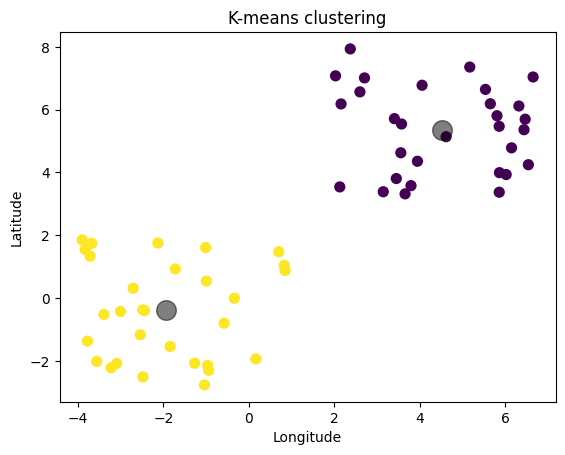

In [65]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)